# CS8080: Data Discovery - Laboratorio 4
#### Equipos de hasta 4 personas

**Integrantes:**

1. Dante Baldeon

2. Roberto Hurtado

3. Javier Linares

4. Marco Morales

## Parte 1: Actividades en clase de Visual Data Discovery (5 puntos)

#### 1.1 [Actividad: Gramática de los gráficos (realizada en clase del 08/03/2025) (2 puntos)](https://docs.google.com/presentation/d/1gvfunH2Dc6xJJBvwzCRQ0fadLUxuuynQfdYc2c-e4nU/edit?usp=sharing)

#### 1.2 [Actividad: Criticar y mejorar gráficos (realizada en clase del 08/03/2025) (1 punto)](https://docs.google.com/presentation/d/1zbmkeEIvBKDkWXrhfeQQgBFyd4iNgy-SBapO4P16Tf8/edit)

#### 1.3 [Actividad: Qué gráfico usar (realizada en clase del 15/03/2025) (2 puntos)](https://docs.google.com/presentation/d/1Q8FgUp8bVeFf67IA9tiCaKwF1WlQxezvFyGVkztVyeU/edit#slide=id.g3332618df29_0_53)

Para estas tres actividades (1.1, 1.2 y 1.3) se considerarán los equipos en los que participaron en las actividades (el cual puede ser distinto al equipo con el están realizando el desarrollo del presente laboratorio)

## Parte 2: Teoría (3 puntos)

Responda las siguientes preguntas (1pto cada uno):

a) ¿Hasta qué punto la sobrecarga visual puede ser contraproducente en el descubrimiento de datos? ¿Cómo se pueden diseñar interfaces que minimicen este problema?

b) ¿Qué riesgos existen al basar decisiones en patrones identificados a través de Visual Data Discovery, considerando que la visualización puede ocultar o enfatizar ciertos aspectos de los datos?

c) ¿Cómo se pueden mitigar los efectos de la manipulación visual en la toma de decisiones basada en datos?


### Respuestas

#### a)

La sobrecarga visual ocurre cuando se presentan demasiados elementos o representaciones complejas, dificultando la comprensión y el descubrimiento de patrones. Para minimizarla, se puede:

- Usar principios de diseño centrados en la simplicidad (colores limitados, tipografía legible).
- Ofrecer interacciones graduales (filtrado, zoom, resúmenes de alto nivel) para que el usuario explore sin perderse en detalles irrelevantes.
- Respetar la “jerarquía visual” (tamaños, posiciones, contrastes) para guiar la atención a la información clave. 

#### b)

Los riesgos de basar decisiones en patrones identificados a través de Visual Data Discovery son:

- Ocultar o enfatizar ciertos aspectos de los datos.
- Manipulación visual puede engañar o distorsionar la percepción de los datos.

#### c)

Para mitigar los efectos de la manipulación visual en la toma de decisiones, se puede:

- Realizar análisis adicionales para validar los patrones identificados.
- Involucrar expertos en el dominio para revisar y validar los resultados.

## Parte 3: Práctica (12 puntos)

La práctica consiste en aplicar **Visual Data Discovery** para identificar patrones en un dataset. En particular, trabajaremos con un dataset sobre **pérdidas de clientes en Telco**, una empresa ficticia del sector telecomunicaciones. El objetivo es **identificar factores de riesgo de abandono (churn)**, lo que permitirá desarrollar estrategias de **retención de clientes** y respaldar **decisiones informadas en un contexto de negocio**.  

El entregable es el código en el presente notebook con:
- 4 o 5 visualizaciones clave, indicando la historia que cuenta cada gráfico en relación con la problemática.
- Al menos 2 recomendaciones estratégicas enfocándose en insights accionables, los cuales sean respaldados por las visualizaciones realizadas anteriormente.

---

#### **Objetivos del Análisis**  
1. Detectar patrones y segmentos de clientes con alto riesgo de churn.
2. Identificar factores críticos que contribuyen a la pérdida de clientes.
3. Proponer estrategias basadas en los hallazgos para reducir la tasa de abandono.
4. Presentar los resultados de manera clara y accionable para la toma de decisiones.
   
#### **Consideraciones para las visualizaciones**  
✅ Preparar gráficos y visualizaciones que resalten los hallazgos clave (por ejemplo, factores de riesgo y características del cliente que contribuyen al churn).  
✅ Utilizar gráficos claros y concisos, asegurándose de que respalden las recomendaciones para la toma de decisiones.  
✅ Aplicar buenas prácticas en visualización de datos, evitando sobrecarga visual y enfatizando los insights más relevantes.  

---

#### **Consideraciones para las recomendaciones estratégicas**  
📌 Con base en los resultados obtenidos, desarrollar estrategias de retención específicas.  
📌 Justificar cómo estas recomendaciones podrían reducir el churn y el impacto que tendrían en el negocio.  

In [19]:
import pandas as pd
%matplotlib inline
import numpy as np 
from scipy import stats
import seaborn as sns 
from scipy.stats import mode
import pandas as pd
import matplotlib.pyplot as plt

demographics = pd.read_csv("data/Telco_customer_churn_demographics.csv")
location = pd.read_csv("data/Telco_customer_churn_location.csv")
population = pd.read_csv("data/Telco_customer_churn_population.csv")
status = pd.read_csv("data/Telco_customer_churn_status.csv")
services = pd.read_csv("data/Telco_customer_churn_services.csv")

# 1. Union y limpieza de los datos

In [20]:
df = pd.merge(status, demographics, on='Customer ID', how='left')
df = pd.merge(df, location, on='Customer ID', how='left')
df = pd.merge(df, population, on='Zip Code', how='left')
df = pd.merge(df, services, on='Customer ID', how='left')

# Valores nulos
print(df.isnull().sum())

# Función para verificar si una columna contiene solo "Yes" o "No"
def is_yes_no(col):
    unique_vals = set(col.dropna().unique())  # valores únicos sin NaN
    return unique_vals.issubset({'Yes', 'No'})

# Identificar columnas que cumplan esa condición
yes_no_cols = [c for c in df.columns if is_yes_no(df[c])]

# Aplicar la conversión a esas columnas
#df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0})
df[yes_no_cols] = df[yes_no_cols].apply(lambda col: col.map({'Yes': 1, 'No': 0}))

# Eliminar columna "Count" que no aporta
df = df.drop(columns=['Count'])

df = df.drop('Churn Label', axis=1)


import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Creamos un OneHotEncoder (indica handle_unknown='ignore' si hay categorías inesperadas)
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Ajustamos (fit) el encoder a la columna categórica
# df[['col_cat']] -> DataFrame de una sola columna
encoder.fit(df[['Contract']])

# Transformamos la columna y creamos un nuevo DataFrame con las columnas codificadas
encoded_array = encoder.transform(df[['Contract']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Contract']))

# Concatenamos con el df original (opcionalmente podrías dropear la columna original)
df_onehot = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

df = df_onehot

Customer ID                             0
Quarter_x                               0
Customer Status                         0
Churn Label                             0
Churn Value                             0
Churn Category                       5174
Churn Reason                         5174
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
ID                                      0
Population                              0
Count                                   0
Quarter_y                         

# 2. Exploración de datos

## Estadisticas de los datos

In [21]:
df.describe(include='all')

,Customer ID,Quarter_x,Customer Status,Churn Value,Churn Category,Churn Reason,Gender,Age,Under 30,Senior Citizen,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
count,7043,7043,7043,7043.000000,1869,1869,7043,7043.000000,7043.000000,7043.000000,...,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,1,3,NaN,5,20,4,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8779-QRDMV,Q3,Stayed,NaN,Competitor,Competitor had better devices,Male,NaN,NaN,NaN,...,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,7043,4720,NaN,841,313,2918,NaN,NaN,NaN,...,3909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.265370,NaN,NaN,NaN,47.466279,0.198921,0.162147,...,NaN,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056,0.512566,0.220077,0.267358
std,NaN,NaN,NaN,0.441561,NaN,NaN,NaN,18.391529,0.399217,0.368612,...,NaN,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542,0.499878,0.414328,0.442612
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,19.000000,0.000000,0.000000,...,NaN,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,33.000000,0.000000,0.000000,...,NaN,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,46.000000,0.000000,0.000000,...,NaN,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000,1.000000,0.000000,0.000000
75%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,60.000000,0.000000,0.000000,...,NaN,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,1.000000,0.000000,1.000000


## Distribución de la variable objetivo (Churn Value)

Churn Value
0    5174
1    1869
Name: count, dtype: int64


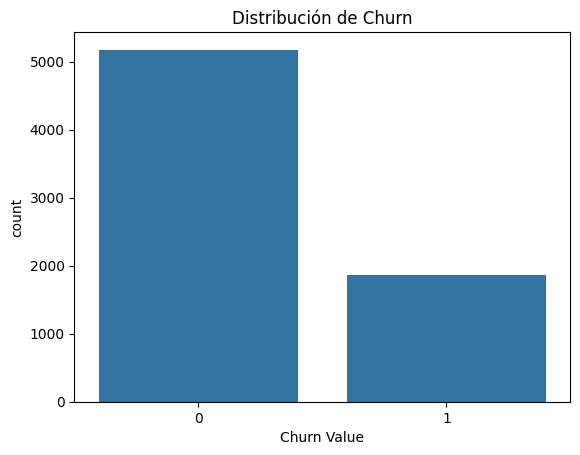

In [22]:
print(df['Churn Value'].value_counts())
sns.countplot(data=df, x='Churn Value')
plt.title("Distribución de Churn")
plt.show()

## Matriz de correlaciones

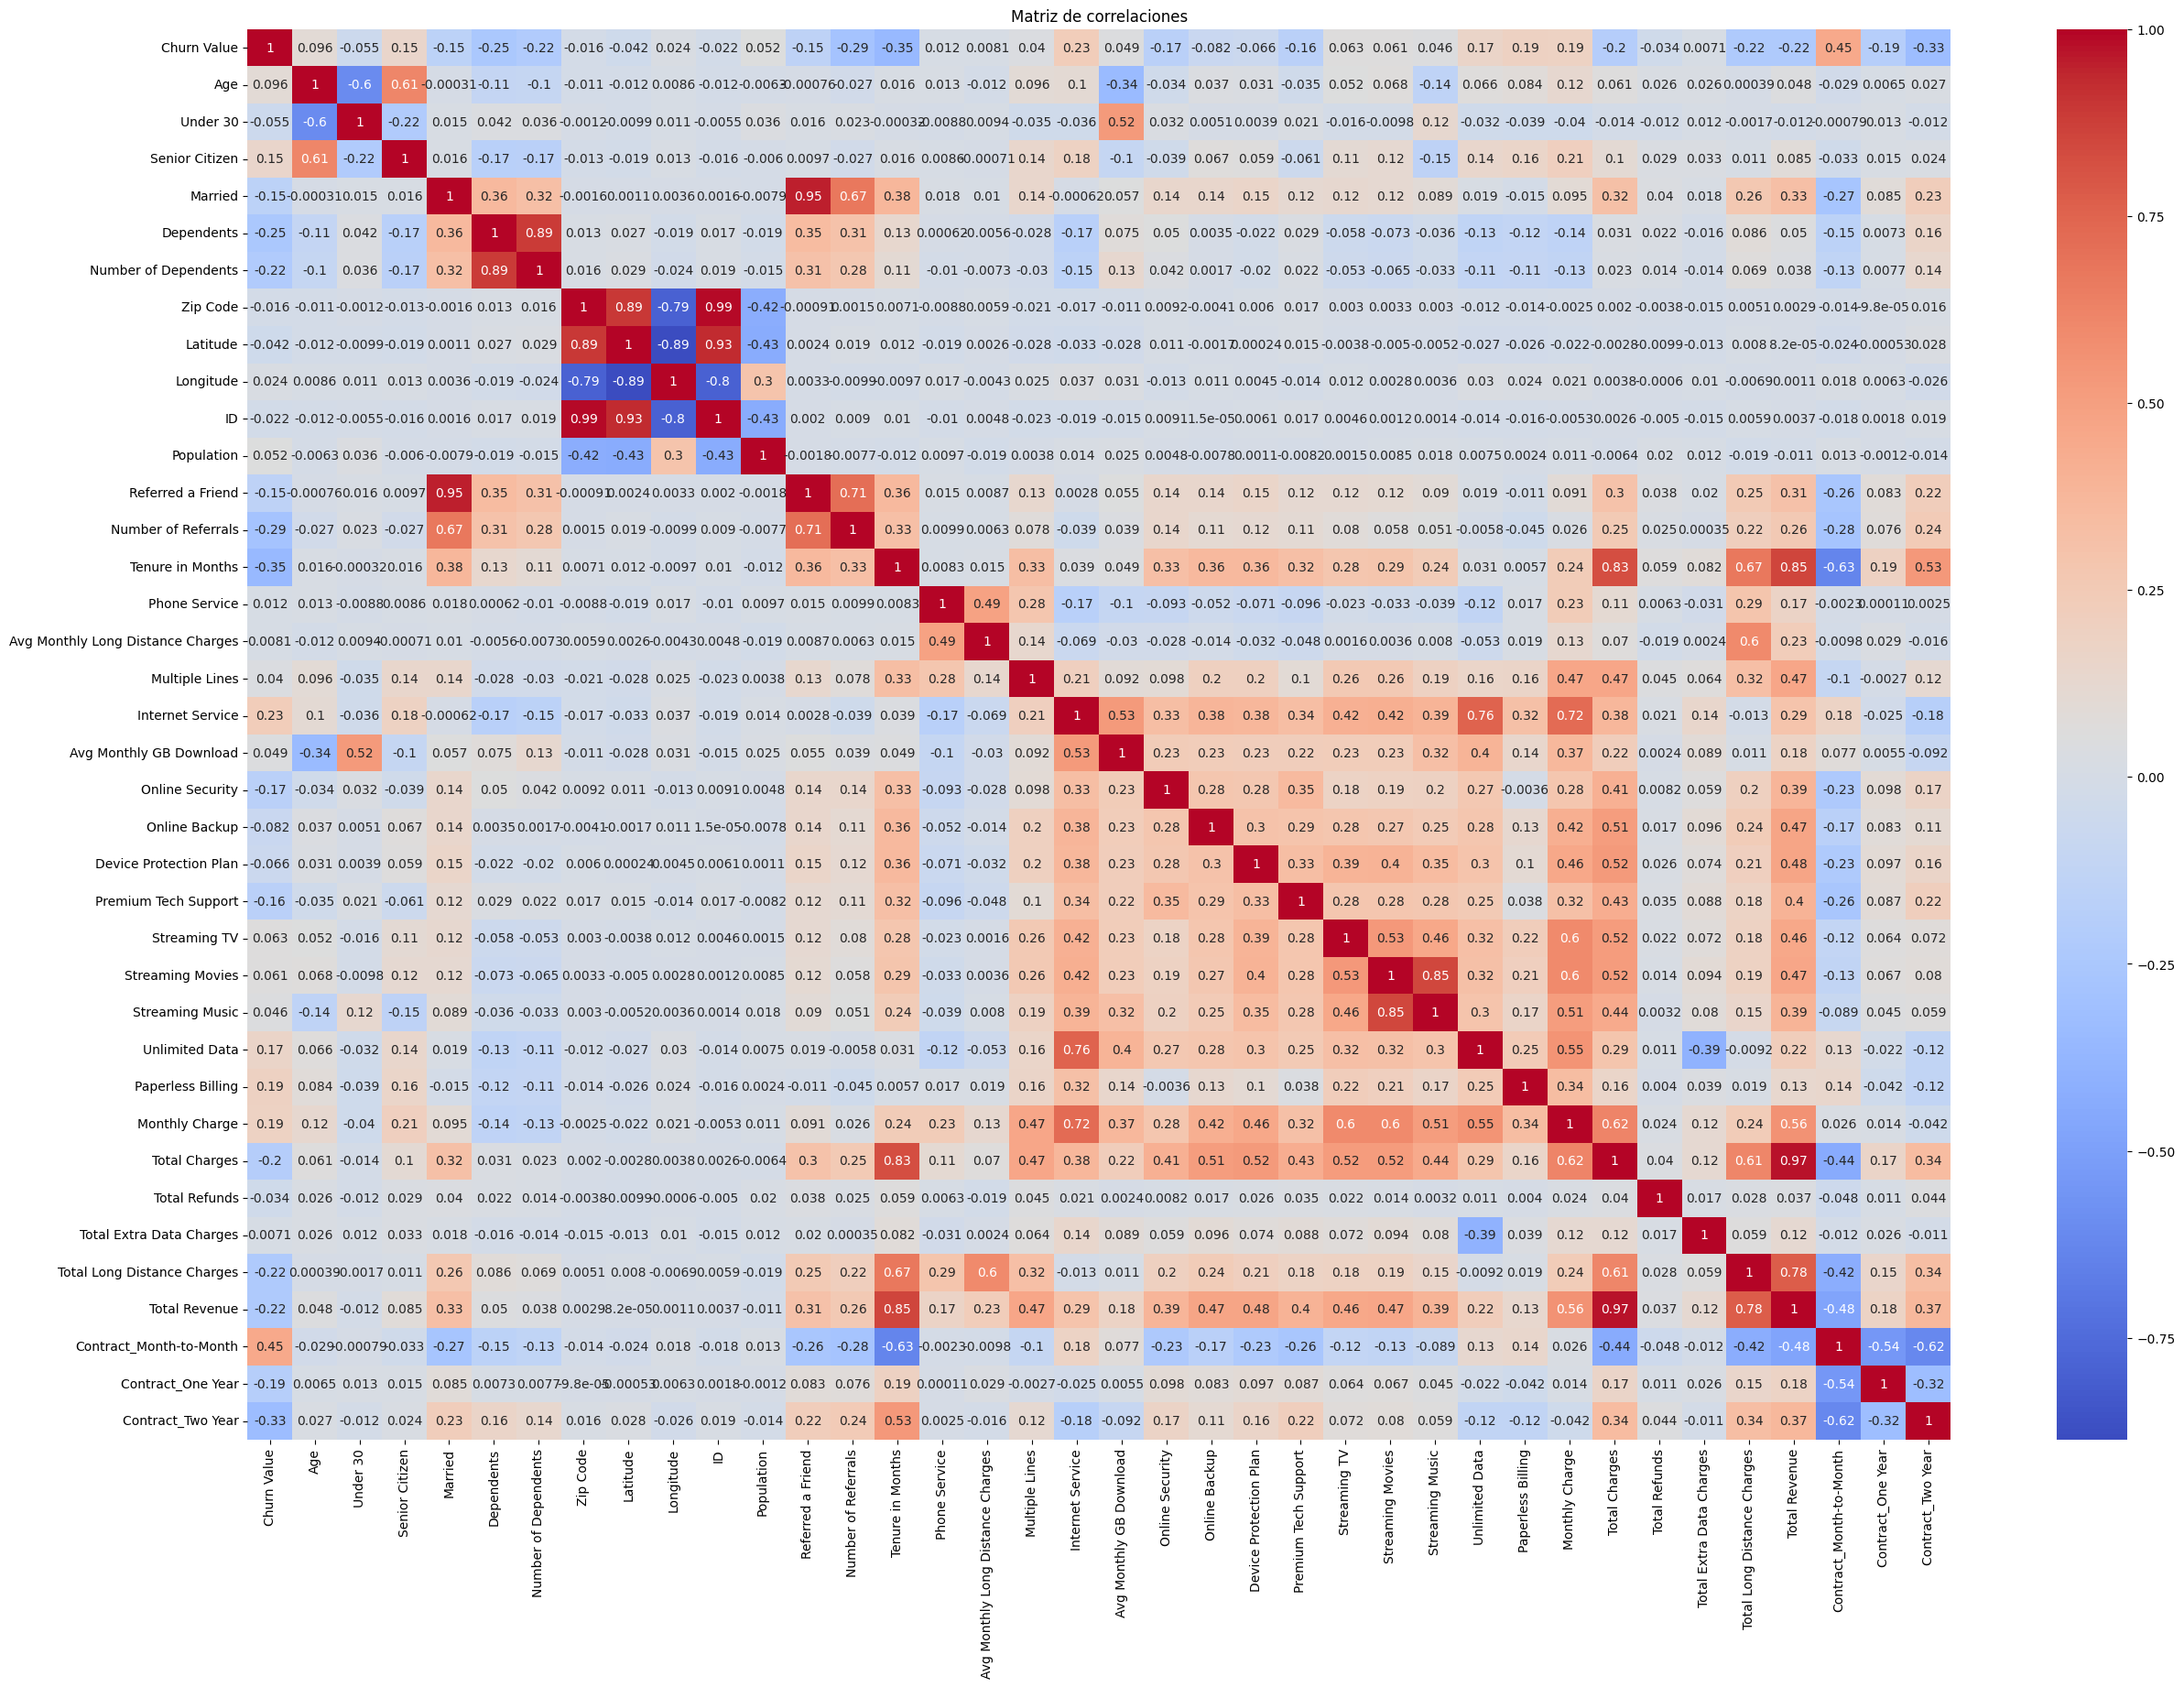

In [23]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlaciones")
plt.show()

# 3. Visualizaciones


## Contract vs Churn

explicacion

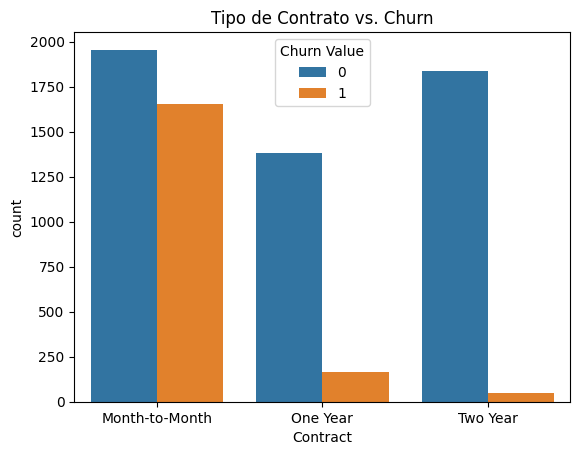

In [24]:
sns.countplot(data=df, x='Contract', hue='Churn Value')
plt.title("Tipo de Contrato vs. Churn")
plt.show()

## Distribucion de Tenure segun Churn

explicacion

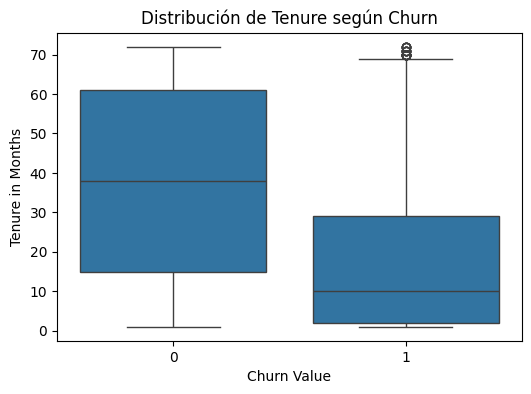

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn Value', y='Tenure in Months')
plt.title("Distribución de Tenure según Churn")
plt.show()

## Distribucion de numero de referencias segun Churn

explicacion

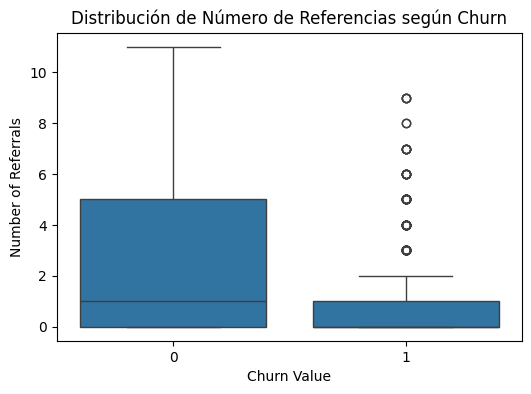

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn Value', y='Number of Referrals')
plt.title("Distribución de Número de Referencias según Churn")
plt.show()

## Dependents vs Churn

explicacion

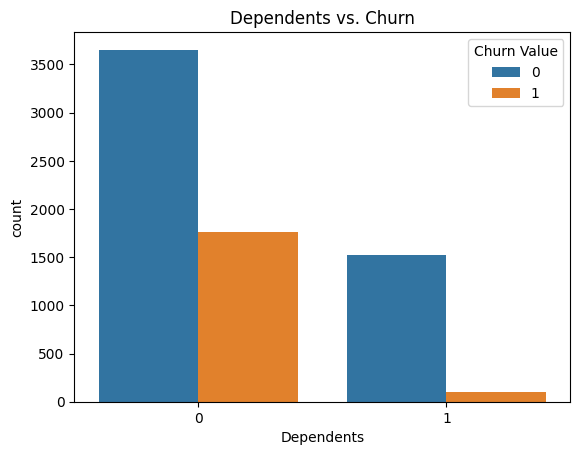

In [27]:
sns.countplot(data=df, x='Dependents', hue='Churn Value')
plt.title("Dependents vs. Churn")
plt.show()

# 4. Recomendaciones  estrategicas

- Anualidad con mayor descuento y siempre visible la diferencia de costo entre mensualidad y anualidad
- Mayor incentivo para referencias, meses gratis
- Campana publicitaria enfocada a familias